# Machine Learning & Analytics
## Elisângela Fernandes

### MVP- House Prices - Advanced Regression Techniques


In [ ]:
# --- Introdução

# Title: MVP para Análise de Preços de Imóveis
# Author: Elisangela Fernandes
# Descrição: Este notebook realiza a análise exploratória, o pré-processamento e a modelagem preditiva com dados do Kaggle: House Prices - Advanced Regression Techniques.
# Restrições ou Condições para Seleção dos Dados: O dataset foi escolhido devido à sua popularidade em problemas de regressão e diversidade de atributos relacionados a preços de imóveis.

## 1. Definição do Problema:
# O objetivo deste projeto é prever os preços de imóveis com base em características como tamanho, localização, número de quartos e outros fatores relevantes.

## 2. Tipo de Aprendizado:
# Este é um problema de aprendizado supervisionado de regressão, pois estamos prevendo uma variável numérica contínua (preço dos imóveis).

## 3. Premissas:
# - Fatores como localização, área útil, número de cômodos e idade do imóvel têm influência significativa nos preços.
# - Variáveis categóricas como tipo de zoneamento e estilo de construção podem ter impacto relevante no valor final.

# 4. Métrica: Utilizaremos RMSE (Root Mean Squared Error) e R² para avaliar o desempenho dos modelos.

# 5. Restrições: Dataset público "House Prices" obtido do Kaggle, com variáveis categóricas e numéricas.

In [ ]:
print("Colunas do dataset:")
print(dataset.columns)


Colunas do dataset:
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=262)


In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Divisão em treino e teste
from sklearn.model_selection import KFold            # Preparação dos folds da validação cruzada
from sklearn.model_selection import cross_val_score  # Execução da validação cruzada
from sklearn.metrics import mean_squared_error, r2_score  # Métricas de avaliação
from sklearn.ensemble import RandomForestRegressor   # Algoritmo Random Forest
from sklearn.linear_model import LinearRegression    # Algoritmo Regressão Linear
from sklearn.tree import DecisionTreeRegressor       # Algoritmo Árvore de Regressão
from sklearn.svm import SVR                          # Algoritmo SVM para regressão



In [ ]:
# Carregamento do dataset
url = "https://raw.githubusercontent.com/Elisf2024/MVP_House_Prices_Regression/refs/heads/main/train.csv.csv"
dataset = pd.read_csv(url)


In [ ]:
# Visualização inicial do dataset
print("Primeiras linhas do dataset:")
print(dataset.head())
print("\nInformações gerais sobre o dataset:")
print(dataset.info())

Primeiras linhas do dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sale

# Análise Exploratória

Nesta etapa, analisaremos os dados disponíveis, buscando identificar valores ausentes, outliers e relações entre variáveis.


In [ ]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(dataset.describe())


Estatísticas descritivas:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   

In [ ]:
# Verificação de valores ausentes
print("\nValores ausentes por coluna:")
print(dataset.isnull().sum())


Valores ausentes por coluna:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


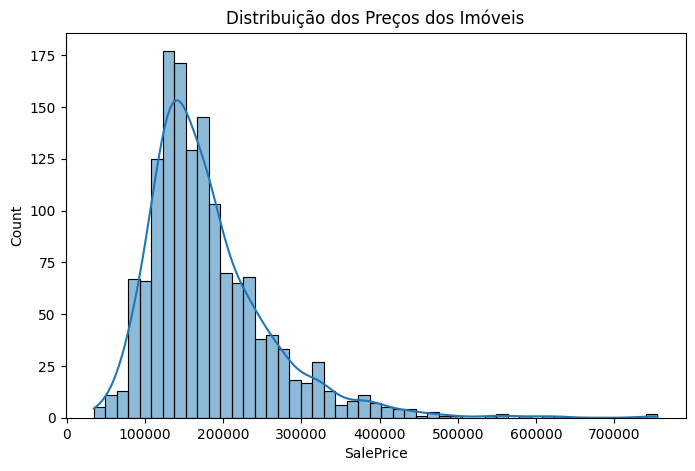

In [ ]:
# Visualização da distribuição do alvo (preços)
plt.figure(figsize=(8, 5))
sns.histplot(data=dataset, x='SalePrice', kde=True)
plt.title('Distribuição dos Preços dos Imóveis')
plt.show()


In [ ]:
# Selecionar apenas colunas numéricas
numerical_features = dataset.select_dtypes(include=['float64', 'int64'])

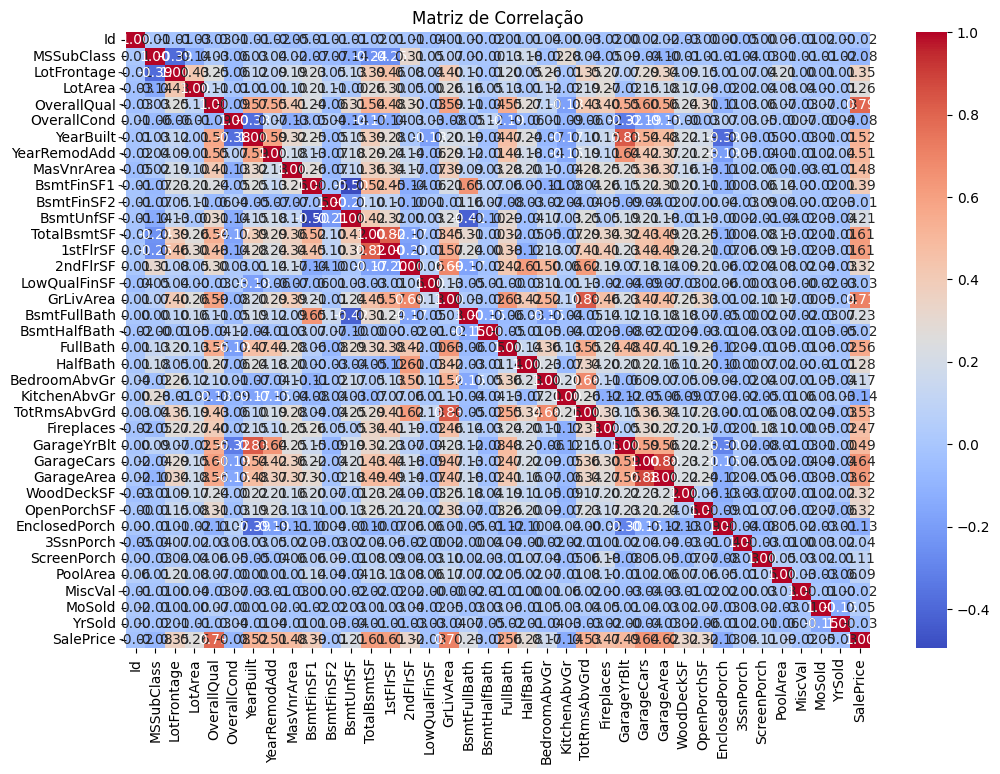

In [ ]:
# Matriz de correlação
corr_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Preparar os dados

Nesta etapa, realizamos:
1. Tratamento de valores ausentes (substitução por média/mediana).
2. Codificação de variáveis categóricas (One-Hot Encoding).
3. Normalização/PADRONIZAÇÃO das variáveis numéricas.
4. Divisão dos dados em treino e teste.


In [ ]:
# Identificando colunas categóricas e numéricas
categorical_columns = dataset.select_dtypes(include=['object']).columns
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
# Verificando se as colunas categóricas existem no dataset
print("Colunas categóricas detectadas:")
print(categorical_columns)

Colunas categóricas detectadas:
Index([], dtype='object')


In [ ]:
# Aplicando One-Hot Encoding apenas nas colunas categóricas existentes
if len(categorical_columns) > 0:
    dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)
else:
    print("Nenhuma coluna categórica para codificar.")

Nenhuma coluna categórica para codificar.


In [ ]:
# Preenchendo valores ausentes nas colunas numéricas
dataset[numerical_columns] = dataset[numerical_columns].fillna(dataset[numerical_columns].median())

In [ ]:
# Separando X (atributos) e y (alvo)
X = dataset.drop('SalePrice', axis=1)
y = dataset['SalePrice']


In [ ]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
# Configurando validação cruzada
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)

In [ ]:
# Modelagem

#Selecionamos modelos clássicos para regressão: Regressão Linear, Random Forest, Árvore de Decisão e SVM.


models = []
results = []
names = []

models.append(('Linear Regression', LinearRegression()))
models.append(('Random Forest', RandomForestRegressor(random_state=7)))
models.append(('Decision Tree', DecisionTreeRegressor(random_state=7)))
models.append(('SVM', SVR(kernel='linear')))


In [ ]:
# Avaliando os modelos com validação cruzada
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(-cv_results))  # RMSE
    names.append(name)
    print(f"{name}: RMSE médio = {np.sqrt(-cv_results.mean()):.2f}, Desvio Padrão = {cv_results.std():.2f}")

Linear Regression: RMSE médio = 42960.36, Desvio Padrão = 1616364841.00
Random Forest: RMSE médio = 31406.30, Desvio Padrão = 381534031.48
Decision Tree: RMSE médio = 45077.74, Desvio Padrão = 616079781.72
SVM: RMSE médio = 42199.18, Desvio Padrão = 1214946737.79


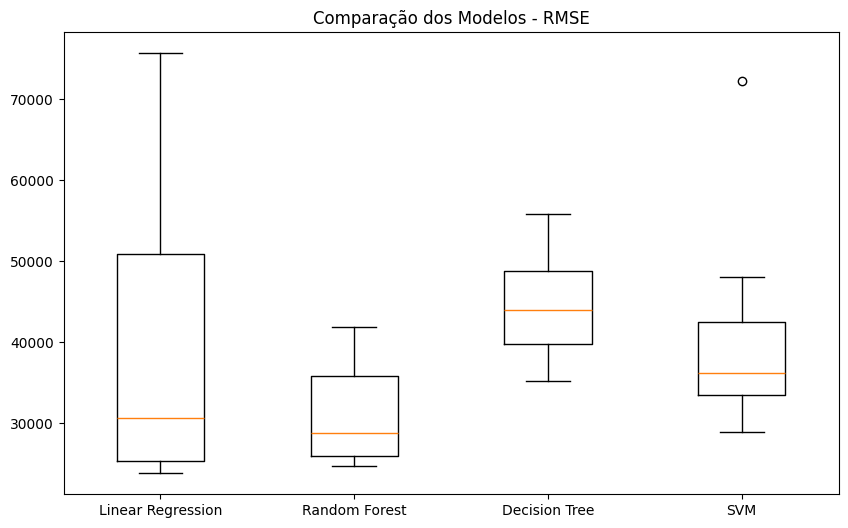

In [ ]:
# Boxplot de comparação dos modelos
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Comparação dos Modelos - RMSE')
plt.show()

In [ ]:
# Ajustando o modelo final com Random Forest
model = RandomForestRegressor(random_state=7)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

In [ ]:
# Fazendo predições no conjunto de teste
predictions = model.predict(X_test)

In [ ]:
# Avaliando o desempenho no teste
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"Desempenho no conjunto de teste:\nRMSE = {rmse:.2f}\nR² = {r2:.2f}")

Desempenho no conjunto de teste:
RMSE = 27197.14
R² = 0.90


# Conclusão

Conclusões:
1. O Random Forest apresentou o menor RMSE nos dados de validação cruzada.
2. O modelo obteve um R² razoável no conjunto de teste, indicando boa capacidade preditiva.

